In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import json_normalize
import warnings

# Configuraciones basicas
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

COLORS = {'No': '#2ecc71', 'Yes': '#e74c3c'}
PALETTE = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']

#📌 Extracción

In [2]:
df_raw = pd.read_json("https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json")

In [3]:
df_raw.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
df_raw["customer"][1]

{'gender': 'Male',
 'SeniorCitizen': 0,
 'Partner': 'No',
 'Dependents': 'No',
 'tenure': 9}

#🔧 Transformación

In [5]:
df_raw = json_normalize(df_raw.to_dict(orient="records"), sep="_")

In [6]:
df_raw.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4


In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [8]:
print(f" Dataset cargado exitosamente")
print(f"   Registros: {df_raw.shape[0]:,}")
print(f"   Columnas: {df_raw.shape[1]}")

 Dataset cargado exitosamente
   Registros: 7,267
   Columnas: 21


In [9]:
## 2.1 Conocer el Conjunto de Datos
# Información general del dataset
print(" INFORMACIÓN GENERAL DEL DATASET")
print("=" * 50)
df_raw.info()

 INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSu

In [10]:
# Renombrar columnas para mayor claridad
column_mapping = {
    'customerID': 'ID_Cliente',
    'Churn': 'Churn',
    'customer_gender': 'Genero',
    'customer_SeniorCitizen': 'Adulto_Mayor',
    'customer_Partner': 'Tiene_Pareja',
    'customer_Dependents': 'Tiene_Dependientes',
    'customer_tenure': 'Meses_Contrato',
    'phone_PhoneService': 'Servicio_Telefonico',
    'phone_MultipleLines': 'Multiples_Lineas',
    'internet_InternetService': 'Servicio_Internet',
    'internet_OnlineSecurity': 'Seguridad_Online',
    'internet_OnlineBackup': 'Respaldo_Online',
    'internet_DeviceProtection': 'Proteccion_Dispositivo',
    'internet_TechSupport': 'Soporte_Tecnico',
    'internet_StreamingTV': 'TV_Streaming',
    'internet_StreamingMovies': 'Peliculas_Streaming',
    'account_Contract': 'Tipo_Contrato',
    'account_PaperlessBilling': 'Factura_Digital',
    'account_PaymentMethod': 'Metodo_Pago',
    'account_Charges_Monthly': 'Cargo_Mensual',
    'account_Charges_Total': 'Cargo_Total'
}

df = df_raw.rename(columns=column_mapping).copy()
print("Columnas renombradas correctamente")
print("\nNuevas columnas:")
for col in df.columns:
    print(f"   • {col}")

Columnas renombradas correctamente

Nuevas columnas:
   • ID_Cliente
   • Churn
   • Genero
   • Adulto_Mayor
   • Tiene_Pareja
   • Tiene_Dependientes
   • Meses_Contrato
   • Servicio_Telefonico
   • Multiples_Lineas
   • Servicio_Internet
   • Seguridad_Online
   • Respaldo_Online
   • Proteccion_Dispositivo
   • Soporte_Tecnico
   • TV_Streaming
   • Peliculas_Streaming
   • Tipo_Contrato
   • Factura_Digital
   • Metodo_Pago
   • Cargo_Mensual
   • Cargo_Total


In [11]:
## 2.2 comprobacion de inconsistencias 
# Verificar valores únicos en cada columna
print("VALORES ÚNICOS POR COLUMNA")
print("=" * 50)
for col in df.columns:
    n_unique = df[col].nunique()
    print(f"{col}: {n_unique} valores únicos")
    if n_unique <= 10:
        print(f"   → {df[col].unique().tolist()}")

VALORES ÚNICOS POR COLUMNA
ID_Cliente: 7267 valores únicos
Churn: 3 valores únicos
   → ['No', 'Yes', '']
Genero: 2 valores únicos
   → ['Female', 'Male']
Adulto_Mayor: 2 valores únicos
   → [0, 1]
Tiene_Pareja: 2 valores únicos
   → ['Yes', 'No']
Tiene_Dependientes: 2 valores únicos
   → ['Yes', 'No']
Meses_Contrato: 73 valores únicos
Servicio_Telefonico: 2 valores únicos
   → ['Yes', 'No']
Multiples_Lineas: 3 valores únicos
   → ['No', 'Yes', 'No phone service']
Servicio_Internet: 3 valores únicos
   → ['DSL', 'Fiber optic', 'No']
Seguridad_Online: 3 valores únicos
   → ['No', 'Yes', 'No internet service']
Respaldo_Online: 3 valores únicos
   → ['Yes', 'No', 'No internet service']
Proteccion_Dispositivo: 3 valores únicos
   → ['No', 'Yes', 'No internet service']
Soporte_Tecnico: 3 valores únicos
   → ['Yes', 'No', 'No internet service']
TV_Streaming: 3 valores únicos
   → ['Yes', 'No', 'No internet service']
Peliculas_Streaming: 3 valores únicos
   → ['No', 'Yes', 'No internet servic

In [12]:
# Verificar duplicados
duplicados = df['ID_Cliente'].duplicated().sum()
print(f"\nDUPLICADOS")
print(f"   Registros duplicados en ID_Cliente: {duplicados}")

# Verificar valores nulos
print(f"\nVALORES NULOS")
nulos = df.isnull().sum()
print(nulos[nulos > 0] if nulos.sum() > 0 else "   No hay valores nulos")

# Verificar valores vacíos en columnas de texto
print(f"\nVALORES VACÍOS O EN BLANCO")
for col in df.select_dtypes(include=['object']).columns:
    vacios = (df[col] == '').sum() + (df[col] == ' ').sum()
    if vacios > 0:
        print(f"   {col}: {vacios} valores vacíos")


DUPLICADOS
   Registros duplicados en ID_Cliente: 0

VALORES NULOS
   No hay valores nulos

VALORES VACÍOS O EN BLANCO
   Churn: 224 valores vacíos
   Cargo_Total: 11 valores vacíos


In [13]:
# Análisis detallado de la columna Churn
print("\nDISTRIBUCIÓN DE CHURN (antes de limpieza)")
print(df['Churn'].value_counts(dropna=False))


DISTRIBUCIÓN DE CHURN (antes de limpieza)
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [14]:
# Verificar tipo de datos de Cargo_Total
print(f"\n ANÁLISIS DE CARGO_TOTAL")
print(f"   Tipo de dato actual: {df['Cargo_Total'].dtype}")

# Intentar convertir a numérico para detectar problemas
df['Cargo_Total_num'] = pd.to_numeric(df['Cargo_Total'], errors='coerce')
problemas = df['Cargo_Total_num'].isna().sum()
print(f"   Valores no numéricos: {problemas}")

if problemas > 0:
    print(f"   Valores problemáticos: {df[df['Cargo_Total_num'].isna()]['Cargo_Total'].unique()}")

# Eliminar columna temporal
df.drop('Cargo_Total_num', axis=1, inplace=True)


 ANÁLISIS DE CARGO_TOTAL
   Tipo de dato actual: object
   Valores no numéricos: 11
   Valores problemáticos: [' ']


In [15]:
#2.3 manejo de incosnsistencias
print("LIMPIEZA DE DATOS")
print("=" * 50)

registros_iniciales = len(df)

# 1. Eliminar registros con Churn vacío
df = df[df['Churn'] != '']
print(f"\n1. Registros con Churn vacío eliminados: {registros_iniciales - len(df)}")

# 2. Convertir Cargo_Total a numérico, reemplazando valores inválidos con NaN
df['Cargo_Total'] = pd.to_numeric(df['Cargo_Total'].str.strip(), errors='coerce')
print(f"2. Columna Cargo_Total convertida a numérico")

# 3. Para los registros con Cargo_Total NaN, calcular basado en tenure y cargo mensual
# (Solo si tenure > 0, si no, usar el cargo mensual)
mask_nan = df['Cargo_Total'].isna()
df.loc[mask_nan, 'Cargo_Total'] = df.loc[mask_nan, 'Cargo_Mensual'] * df.loc[mask_nan, 'Meses_Contrato']
# Para los que tienen tenure 0, usar el cargo mensual como aproximación
mask_still_nan = df['Cargo_Total'].isna() | (df['Cargo_Total'] == 0)
df.loc[mask_still_nan & (df['Meses_Contrato'] == 0), 'Cargo_Total'] = df.loc[mask_still_nan & (df['Meses_Contrato'] == 0), 'Cargo_Mensual']

print(f"3. Valores faltantes en Cargo_Total imputados")

# 4. Convertir Adulto_Mayor a valores descriptivos
df['Adulto_Mayor'] = df['Adulto_Mayor'].map({0: 'No', 1: 'Sí'})
print(f"4. Columna Adulto_Mayor convertida a texto descriptivo")

registros_finales = len(df)
print(f"\nResumen:")
print(f"   Registros iniciales: {registros_iniciales:,}")
print(f"   Registros finales: {registros_finales:,}")
print(f"   Registros eliminados: {registros_iniciales - registros_finales:,}")

LIMPIEZA DE DATOS

1. Registros con Churn vacío eliminados: 224
2. Columna Cargo_Total convertida a numérico
3. Valores faltantes en Cargo_Total imputados
4. Columna Adulto_Mayor convertida a texto descriptivo

Resumen:
   Registros iniciales: 7,267
   Registros finales: 7,043
   Registros eliminados: 224


In [16]:
#2.4 Creación de columna cuentas diarias
# Crear columna de cargo diario (asumiendo 30 días por mes)
df['Cargo_Diario'] = df['Cargo_Mensual'] / 30

print("Columna 'Cargo_Diario' creada")
print(f"\nEstadísticas del Cargo Diario:")
print(df['Cargo_Diario'].describe())

Columna 'Cargo_Diario' creada

Estadísticas del Cargo Diario:
count   7043.00
mean       2.16
std        1.00
min        0.61
25%        1.18
50%        2.34
75%        2.99
max        3.96
Name: Cargo_Diario, dtype: float64


In [17]:
# 2.5 Estandarización y transformación de datos
# Crear versiones binarias de las variables categóricas para análisis
df_binary = df.copy()

# Variables binarias (Yes/No)
binary_cols = ['Churn', 'Tiene_Pareja', 'Tiene_Dependientes', 'Servicio_Telefonico', 
               'Factura_Digital']

for col in binary_cols:
    df_binary[f'{col}_Bin'] = df_binary[col].map({'Yes': 1, 'No': 0, 'Sí': 1})

# Adulto Mayor
df_binary['Adulto_Mayor_Bin'] = df_binary['Adulto_Mayor'].map({'Sí': 1, 'No': 0})

# Servicios adicionales (Yes=1, No=0, No internet/phone service=0)
service_cols = ['Multiples_Lineas', 'Seguridad_Online', 'Respaldo_Online', 
                'Proteccion_Dispositivo', 'Soporte_Tecnico', 'TV_Streaming', 
                'Peliculas_Streaming']

for col in service_cols:
    df_binary[f'{col}_Bin'] = df_binary[col].apply(
        lambda x: 1 if x == 'Yes' else 0
    )

# Crear variable de cantidad de servicios adicionales contratados
service_bin_cols = [f'{col}_Bin' for col in service_cols]
df['Cantidad_Servicios'] = df_binary[service_bin_cols].sum(axis=1)
df_binary['Cantidad_Servicios'] = df['Cantidad_Servicios']

print("Variables binarias creadas")
print(f"\nDistribución de cantidad de servicios adicionales:")
print(df['Cantidad_Servicios'].value_counts().sort_index())

Variables binarias creadas

Distribución de cantidad de servicios adicionales:
Cantidad_Servicios
0    1667
1    1158
2     957
3     978
4     933
5     722
6     420
7     208
Name: count, dtype: int64


In [18]:
# Traducir valores de columnas categóricas al español para mejor visualización
traducciones = {
    'Genero': {'Male': 'Masculino', 'Female': 'Femenino'},
    'Tipo_Contrato': {'Month-to-month': 'Mes a mes', 'One year': 'Un año', 'Two year': 'Dos años'},
    'Metodo_Pago': {
        'Electronic check': 'Cheque electrónico',
        'Mailed check': 'Cheque por correo',
        'Bank transfer (automatic)': 'Transferencia bancaria',
        'Credit card (automatic)': 'Tarjeta de crédito'
    },
    'Servicio_Internet': {'DSL': 'DSL', 'Fiber optic': 'Fibra óptica', 'No': 'Sin internet'},
    'Churn': {'Yes': 'Sí', 'No': 'No'}
}


df_viz = df.copy()
for col, mapping in traducciones.items():
    df_viz[col] = df_viz[col].map(mapping).fillna(df_viz[col])

print("Datos traducidos para visualización")

Datos traducidos para visualización


In [19]:
# Vista final del dataset limpio
print("\nDATASET FINAL")
print("=" * 50)
print(f"Dimensiones: {df.shape[0]:,} filas x {df.shape[1]} columnas")
print("\nTipos de datos:")
print(df.dtypes)


DATASET FINAL
Dimensiones: 7,043 filas x 23 columnas

Tipos de datos:
ID_Cliente                 object
Churn                      object
Genero                     object
Adulto_Mayor               object
Tiene_Pareja               object
Tiene_Dependientes         object
Meses_Contrato              int64
Servicio_Telefonico        object
Multiples_Lineas           object
Servicio_Internet          object
Seguridad_Online           object
Respaldo_Online            object
Proteccion_Dispositivo     object
Soporte_Tecnico            object
TV_Streaming               object
Peliculas_Streaming        object
Tipo_Contrato              object
Factura_Digital            object
Metodo_Pago                object
Cargo_Mensual             float64
Cargo_Total               float64
Cargo_Diario              float64
Cantidad_Servicios          int64
dtype: object


In [20]:
df.head(10)

,ID_Cliente,Churn,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Factura_Digital,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario,Cantidad_Servicios
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.19,3
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,2.00,2
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46,1
3,0011-IGKFF,Yes,Male,Sí,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27,4
4,0013-EXCHZ,Yes,Female,Sí,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.80,2
5,0013-MHZWF,No,Female,No,No,Yes,9,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45,2.31,3
6,0013-SMEOE,No,Female,Sí,Yes,No,71,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25,3.66,6
7,0014-BMAQU,No,Male,No,Yes,No,63,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.80,2.82,3
8,0015-UOCOJ,No,Female,Sí,No,No,7,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35,1.61,1
9,0016-QLJIS,No,Female,No,Yes,Yes,65,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.90,3.02,7


#📊 Carga y análisis

In [21]:
#3.1 analisis descriptivo 
# Estadísticas descriptivas de variables numéricas
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("=" * 60)
df[['Meses_Contrato', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario', 'Cantidad_Servicios']].describe()

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS


,Meses_Contrato,Cargo_Mensual,Cargo_Total,Cargo_Diario,Cantidad_Servicios
count,7043.00,7043.00,7043.00,7043.00,7043.00
mean,32.37,64.76,2279.80,2.16,2.46
std,24.56,30.09,2266.73,1.00,2.05
min,0.00,18.25,18.80,0.61,0.00
25%,9.00,35.50,398.55,1.18,1.00
50%,29.00,70.35,1394.55,2.34,2.00
75%,55.00,89.85,3786.60,2.99,4.00
max,72.00,118.75,8684.80,3.96,7.00


In [22]:
# Análisis descriptivo segmentado por Churn
print("\nESTADÍSTICAS POR ESTADO DE CHURN")
print("=" * 60)
df.groupby('Churn')[['Meses_Contrato', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario', 'Cantidad_Servicios']].agg(['mean', 'median', 'std'])


ESTADÍSTICAS POR ESTADO DE CHURN


Meses_Contrato              Cargo_Mensual              Cargo_Total  \
                mean median   std          mean median   std        mean   
Churn                                                                      
No             37.57  38.00 24.11         61.27  64.43 31.09     2550.00   
Yes            17.98  10.00 19.53         74.44  79.65 24.67     1531.80   

                      Cargo_Diario             Cantidad_Servicios              
       median     std         mean median  std               mean median  std  
Churn                                                                          
No    1679.53 2329.86         2.04   2.15 1.04               2.55   2.00 2.15  
Yes    703.55 1890.82         2.48   2.66 0.82               2.22   2.00 1.70

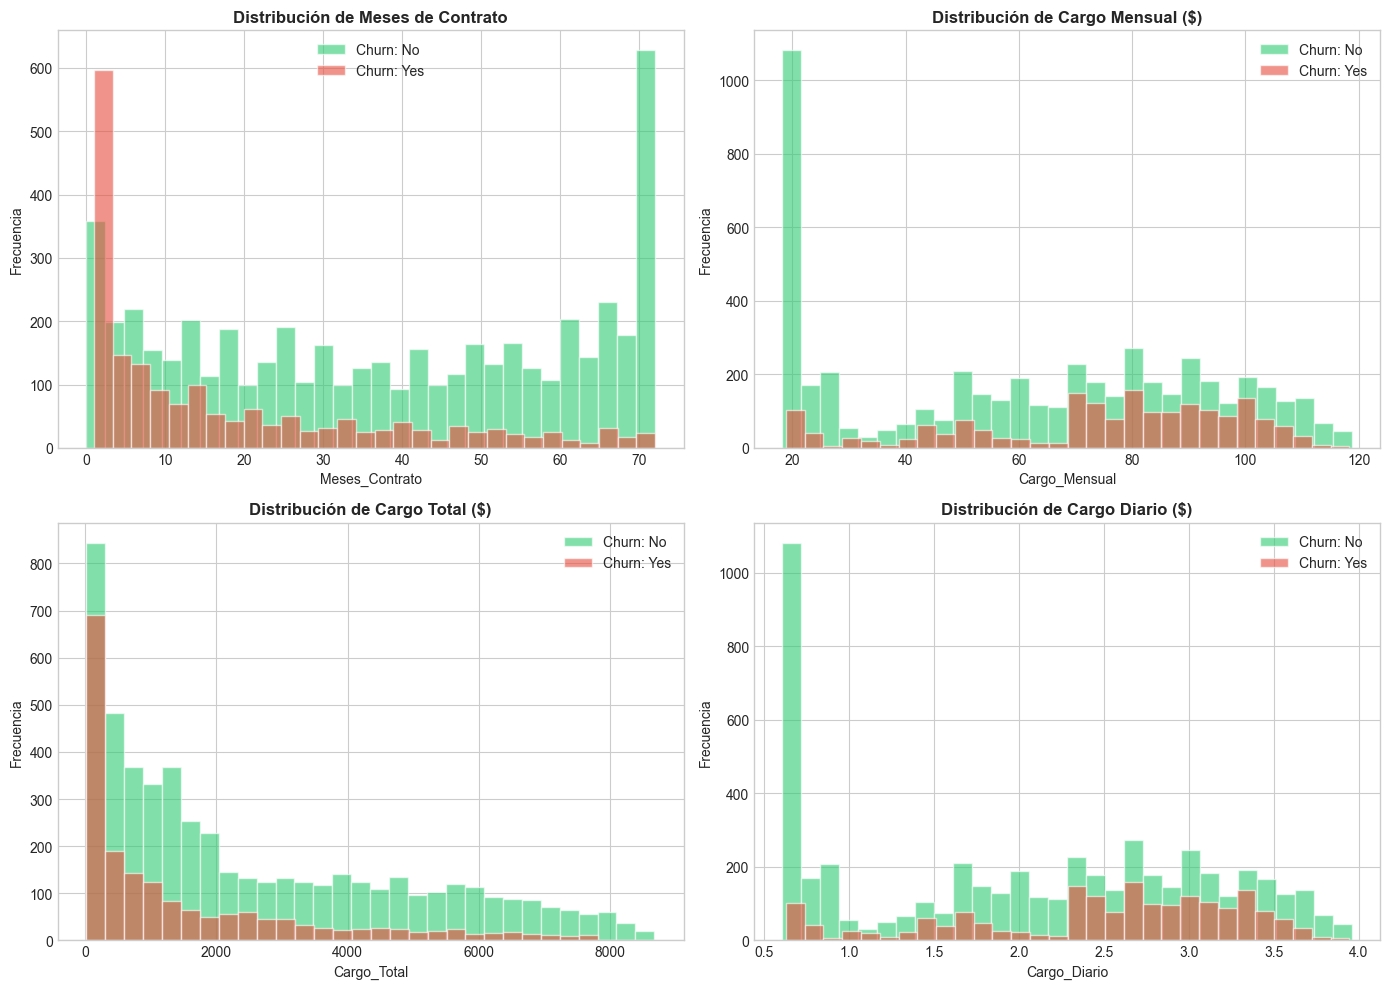

Gráfico guardado: distribucion_variables_numericas.png


In [23]:

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

variables = ['Meses_Contrato', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario']
titles = ['Distribución de Meses de Contrato', 'Distribución de Cargo Mensual ($)', 
          'Distribución de Cargo Total ($)', 'Distribución de Cargo Diario ($)']

for ax, var, title in zip(axes.flatten(), variables, titles):
    for churn, color in COLORS.items():
        data = df[df['Churn'] == churn][var]
        ax.hist(data, bins=30, alpha=0.6, color=color, label=f'Churn: {churn}', edgecolor='white')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')
    ax.legend()

plt.tight_layout()
plt.savefig('distribucion_variables_numericas.png', dpi=150, bbox_inches='tight')
plt.show()
print("Gráfico guardado: distribucion_variables_numericas.png")

In [24]:
# Distribución general de Churn
churn_counts = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100

print("DISTRIBUCIÓN DE CHURN")
print("=" * 40)
for status in ['No', 'Yes']:
    label = 'Permanecen' if status == 'No' else 'Se dan de baja'
    print(f"   {label}: {churn_counts[status]:,} ({churn_pct[status]:.1f}%)")

DISTRIBUCIÓN DE CHURN
   Permanecen: 5,174 (73.5%)
   Se dan de baja: 1,869 (26.5%)


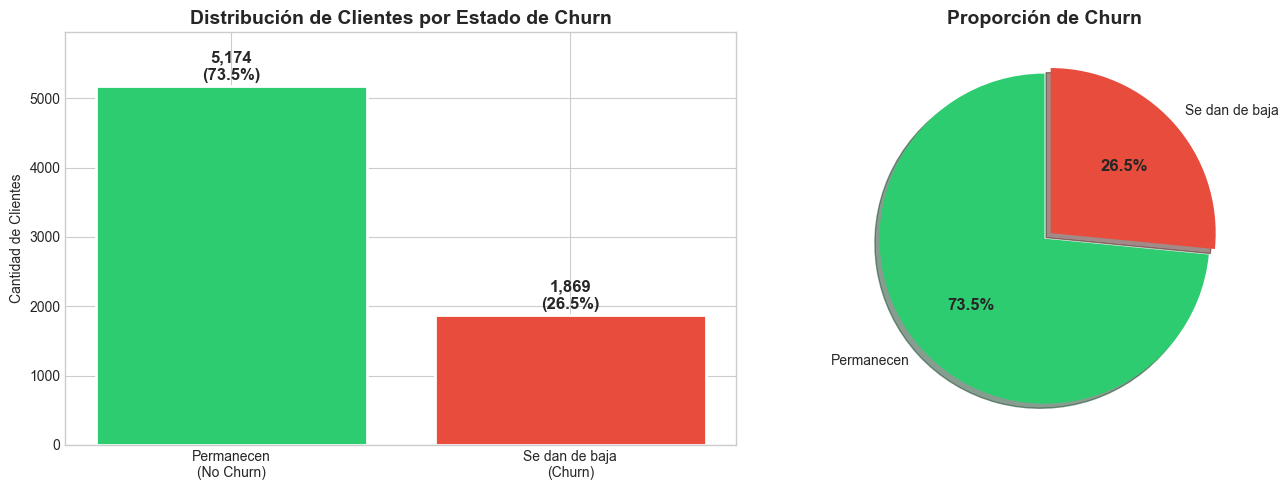

Gráfico guardado: distribucion_churn.png


In [25]:
# Visualización de la distribución de Churn
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
ax1 = axes[0]
bars = ax1.bar(['Permanecen\n(No Churn)', 'Se dan de baja\n(Churn)'], 
               [churn_counts['No'], churn_counts['Yes']], 
               color=[COLORS['No'], COLORS['Yes']], 
               edgecolor='white', linewidth=2)

# Añadir etiquetas en las barras
for bar, count, pct in zip(bars, [churn_counts['No'], churn_counts['Yes']], 
                            [churn_pct['No'], churn_pct['Yes']]):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             f'{count:,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax1.set_title('Distribución de Clientes por Estado de Churn', fontsize=14, fontweight='bold')
ax1.set_ylabel('Cantidad de Clientes')
ax1.set_ylim(0, churn_counts['No'] * 1.15)

# Gráfico de pastel
ax2 = axes[1]
wedges, texts, autotexts = ax2.pie([churn_counts['No'], churn_counts['Yes']], 
                                    labels=['Permanecen', 'Se dan de baja'],
                                    autopct='%1.1f%%',
                                    colors=[COLORS['No'], COLORS['Yes']],
                                    explode=(0, 0.05),
                                    shadow=True,
                                    startangle=90)
ax2.set_title('Proporción de Churn', fontsize=14, fontweight='bold')

for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.tight_layout()
plt.savefig('distribucion_churn.png', dpi=150, bbox_inches='tight')
plt.show()
print("Gráfico guardado: distribucion_churn.png")

In [26]:
# Función para crear gráficos de barras comparativos
def plot_churn_by_category(df, column, title, ax, palette=None):
    """Crea un gráfico de barras mostrando la tasa de churn por categoría"""
    
    # Calcular conteos y tasas
    cross_tab = pd.crosstab(df[column], df['Churn'])
    cross_tab['Total'] = cross_tab.sum(axis=1)
    cross_tab['Tasa_Churn'] = (cross_tab['Yes'] / cross_tab['Total'] * 100).round(1)
    cross_tab = cross_tab.sort_values('Tasa_Churn', ascending=True)
    
    # Crear gráfico de barras horizontales
    y_pos = range(len(cross_tab))
    bars = ax.barh(y_pos, cross_tab['Tasa_Churn'], color='#e74c3c', alpha=0.8, edgecolor='white')
    
    # Añadir etiquetas
    ax.set_yticks(y_pos)
    ax.set_yticklabels(cross_tab.index)
    ax.set_xlabel('Tasa de Churn (%)')
    ax.set_title(title, fontsize=11, fontweight='bold')
    
    # Añadir valores al final de cada barra
    for bar, val in zip(bars, cross_tab['Tasa_Churn']):
        ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{val:.1f}%', va='center', fontsize=9)
    
    ax.set_xlim(0, max(cross_tab['Tasa_Churn']) * 1.2)
    ax.axvline(x=df['Churn'].value_counts(normalize=True)['Yes']*100, 
               color='gray', linestyle='--', alpha=0.7, label='Promedio global')
    
    return cross_tab

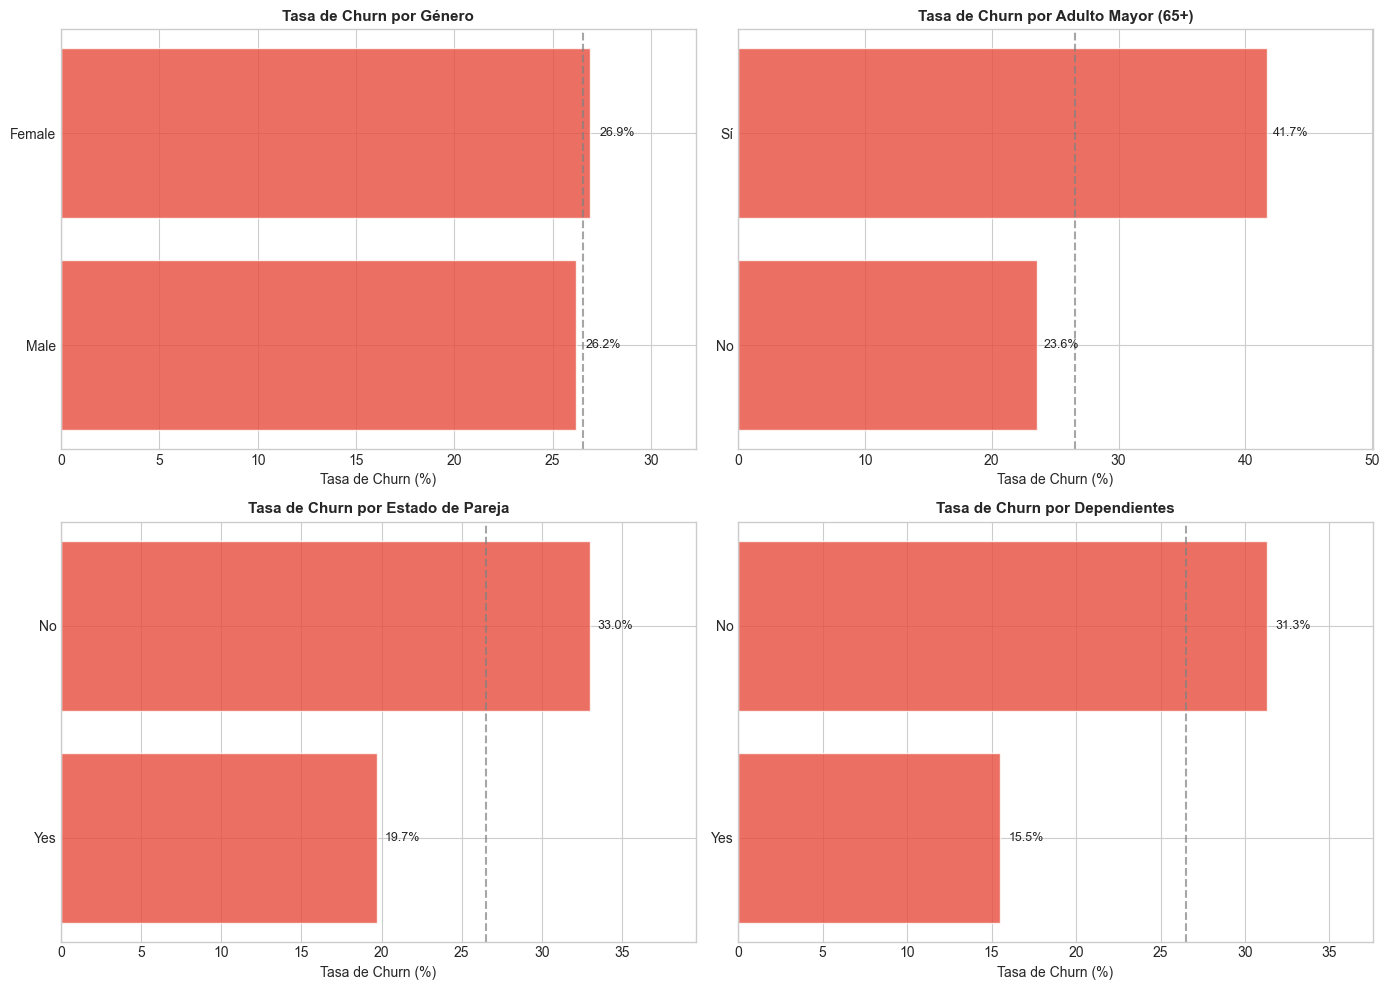

Gráfico guardado: churn_por_demograficos.png


In [27]:
# Análisis de Churn por variables demográficas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

demo_vars = [
    ('Genero', 'Tasa de Churn por Género'),
    ('Adulto_Mayor', 'Tasa de Churn por Adulto Mayor (65+)'),
    ('Tiene_Pareja', 'Tasa de Churn por Estado de Pareja'),
    ('Tiene_Dependientes', 'Tasa de Churn por Dependientes')
]

for ax, (col, title) in zip(axes.flatten(), demo_vars):
    plot_churn_by_category(df, col, title, ax)

plt.tight_layout()
plt.savefig('churn_por_demograficos.png', dpi=150, bbox_inches='tight')
plt.show()
print("Gráfico guardado: churn_por_demograficos.png")

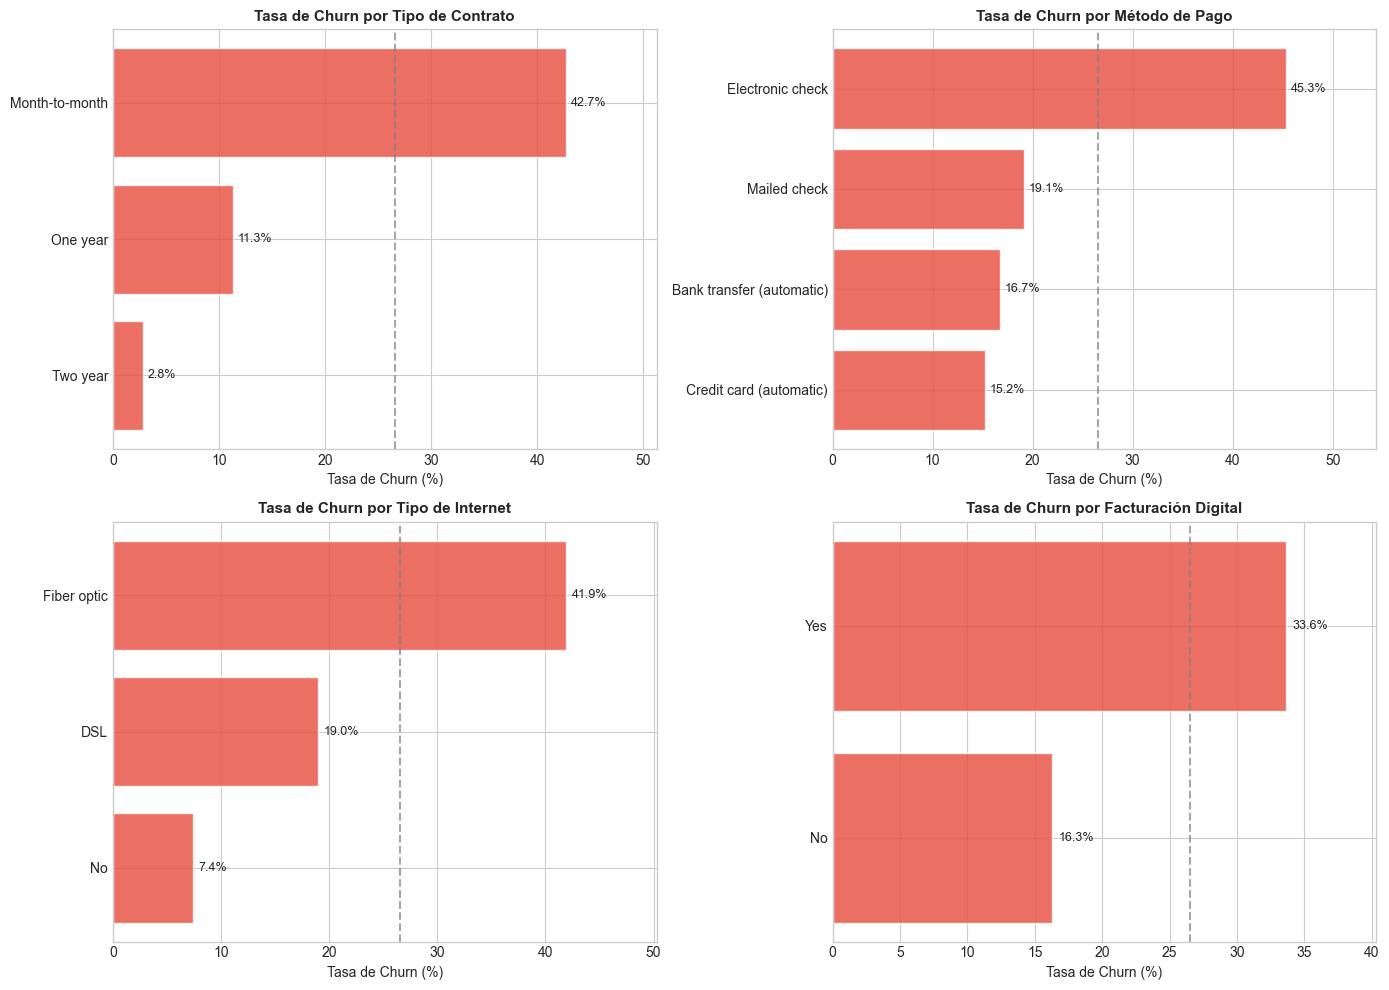

Gráfico guardado: churn_por_contrato_servicios.png


In [28]:
# Análisis de Churn por tipo de contrato y servicios
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

contract_vars = [
    ('Tipo_Contrato', 'Tasa de Churn por Tipo de Contrato'),
    ('Metodo_Pago', 'Tasa de Churn por Método de Pago'),
    ('Servicio_Internet', 'Tasa de Churn por Tipo de Internet'),
    ('Factura_Digital', 'Tasa de Churn por Facturación Digital')
]

for ax, (col, title) in zip(axes.flatten(), contract_vars):
    plot_churn_by_category(df, col, title, ax)

plt.tight_layout()
plt.savefig('churn_por_contrato_servicios.png', dpi=150, bbox_inches='tight')
plt.show()
print("Gráfico guardado: churn_por_contrato_servicios.png")

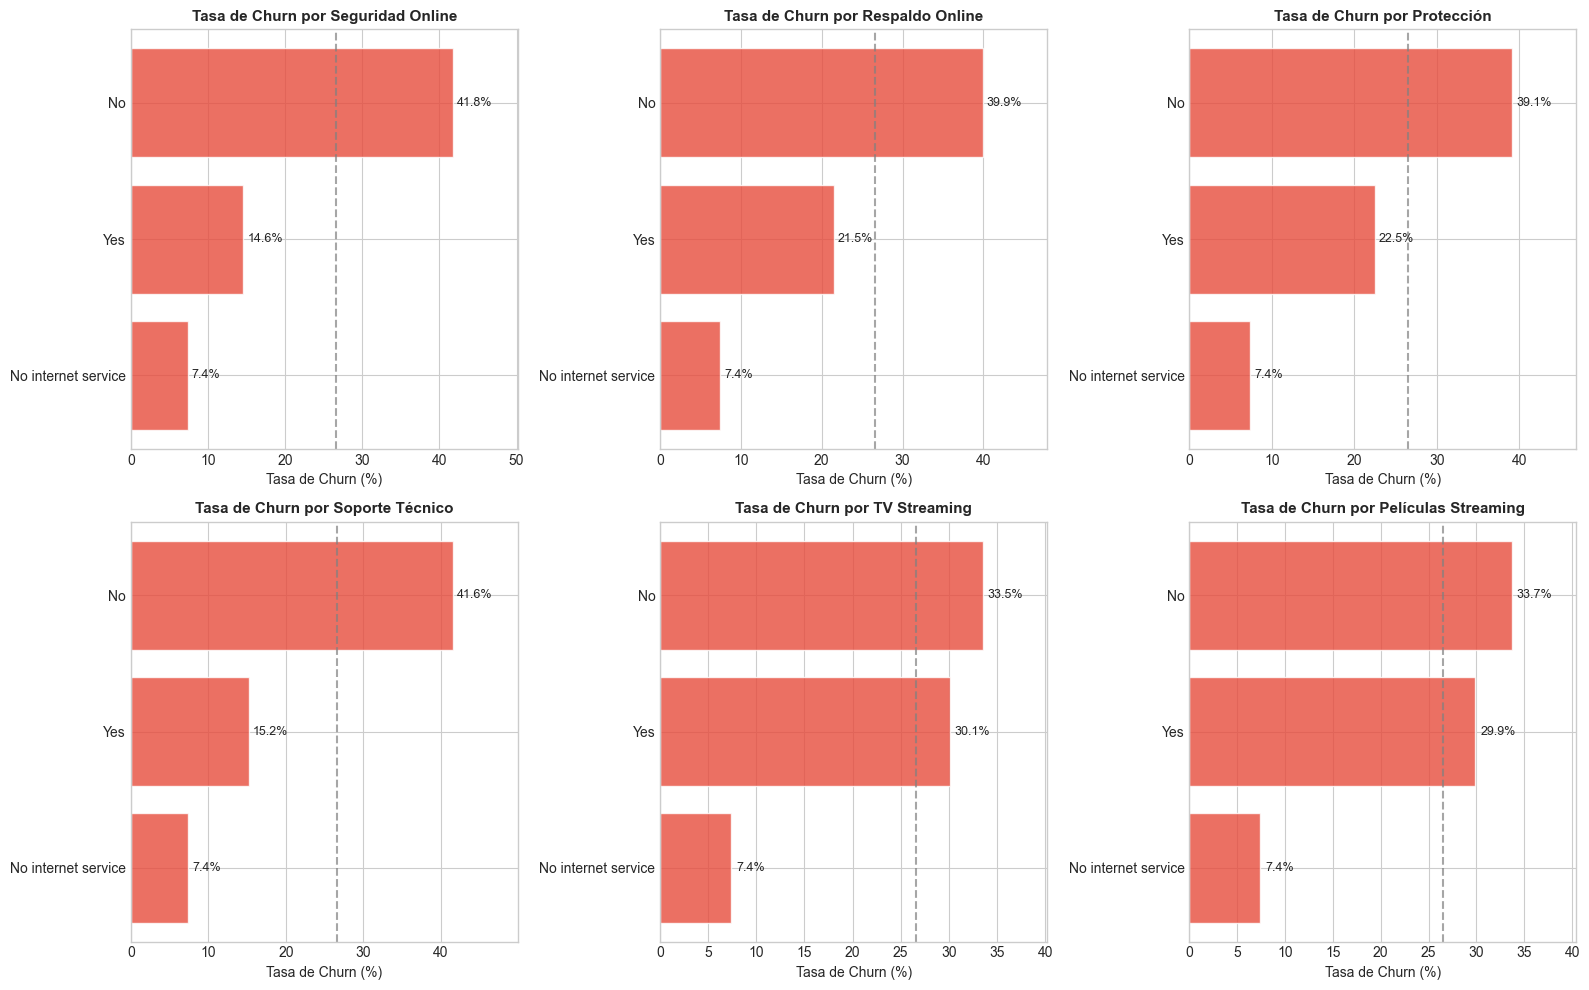

Gráfico guardado: churn_por_servicios_adicionales.png


In [29]:
# Análisis de Churn por servicios adicionales
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

service_vars = [
    ('Seguridad_Online', 'Tasa de Churn por Seguridad Online'),
    ('Respaldo_Online', 'Tasa de Churn por Respaldo Online'),
    ('Proteccion_Dispositivo', 'Tasa de Churn por Protección'),
    ('Soporte_Tecnico', 'Tasa de Churn por Soporte Técnico'),
    ('TV_Streaming', 'Tasa de Churn por TV Streaming'),
    ('Peliculas_Streaming', 'Tasa de Churn por Películas Streaming')
]

for ax, (col, title) in zip(axes.flatten(), service_vars):
    plot_churn_by_category(df, col, title, ax)

plt.tight_layout()
plt.savefig('churn_por_servicios_adicionales.png', dpi=150, bbox_inches='tight')
plt.show()
print("Gráfico guardado: churn_por_servicios_adicionales.png")

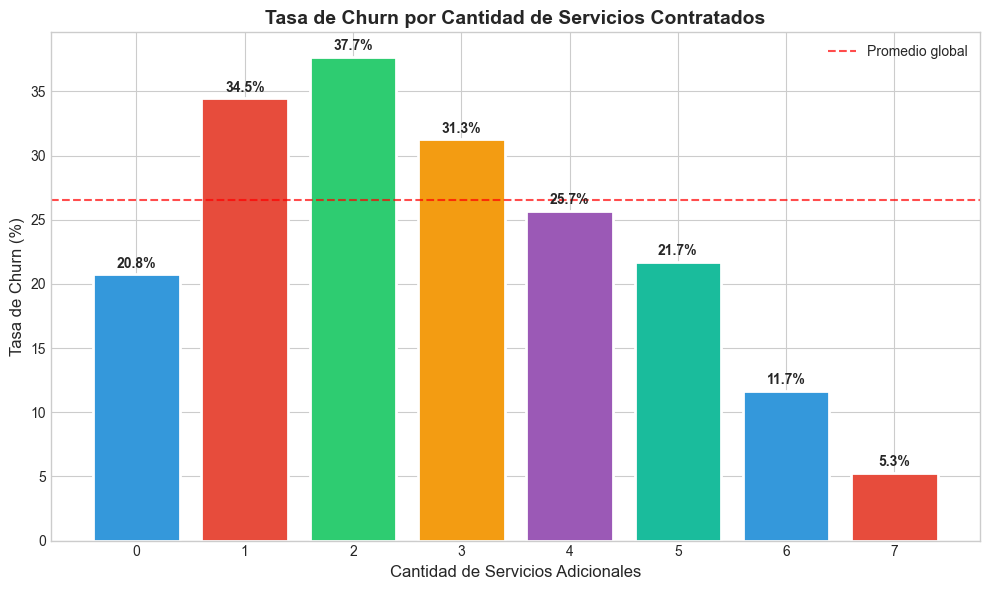

Gráfico guardado: churn_por_cantidad_servicios.png


In [30]:
# Análisis de Churn por cantidad de servicios contratados
fig, ax = plt.subplots(figsize=(10, 6))

churn_by_services = df.groupby('Cantidad_Servicios')['Churn'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
)

bars = ax.bar(churn_by_services.index, churn_by_services.values, 
              color=PALETTE, edgecolor='white', linewidth=2)

for bar, val in zip(bars, churn_by_services.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
            f'{val:.1f}%', ha='center', fontsize=10, fontweight='bold')

ax.set_xlabel('Cantidad de Servicios Adicionales', fontsize=12)
ax.set_ylabel('Tasa de Churn (%)', fontsize=12)
ax.set_title('Tasa de Churn por Cantidad de Servicios Contratados', fontsize=14, fontweight='bold')
ax.axhline(y=df['Churn'].value_counts(normalize=True)['Yes']*100, 
           color='red', linestyle='--', alpha=0.7, label='Promedio global')
ax.legend()

plt.tight_layout()
plt.savefig('churn_por_cantidad_servicios.png', dpi=150, bbox_inches='tight')
plt.show()
print("Gráfico guardado: churn_por_cantidad_servicios.png")

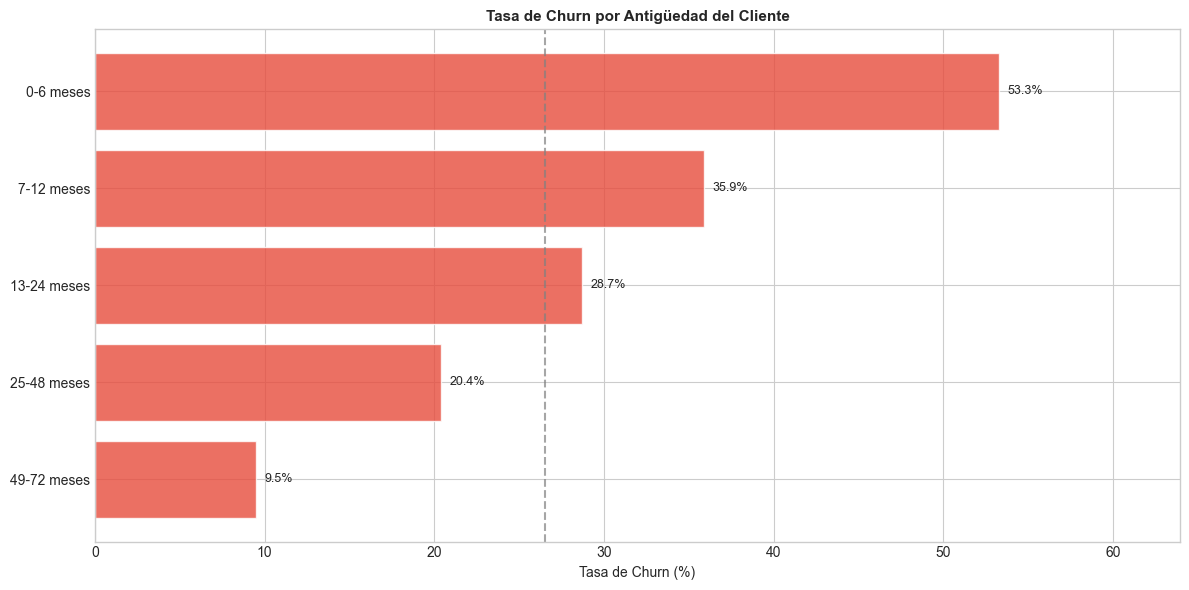

Gráfico guardado: churn_por_tenure.png


In [31]:
# Análisis de Churn por rangos de tenure (antigüedad)
df['Rango_Tenure'] = pd.cut(df['Meses_Contrato'], 
                            bins=[0, 6, 12, 24, 48, 72], 
                            labels=['0-6 meses', '7-12 meses', '13-24 meses', '25-48 meses', '49-72 meses'])

fig, ax = plt.subplots(figsize=(12, 6))

plot_churn_by_category(df, 'Rango_Tenure', 'Tasa de Churn por Antigüedad del Cliente', ax)

plt.tight_layout()
plt.savefig('churn_por_tenure.png', dpi=150, bbox_inches='tight')
plt.show()
print("Gráfico guardado: churn_por_tenure.png")

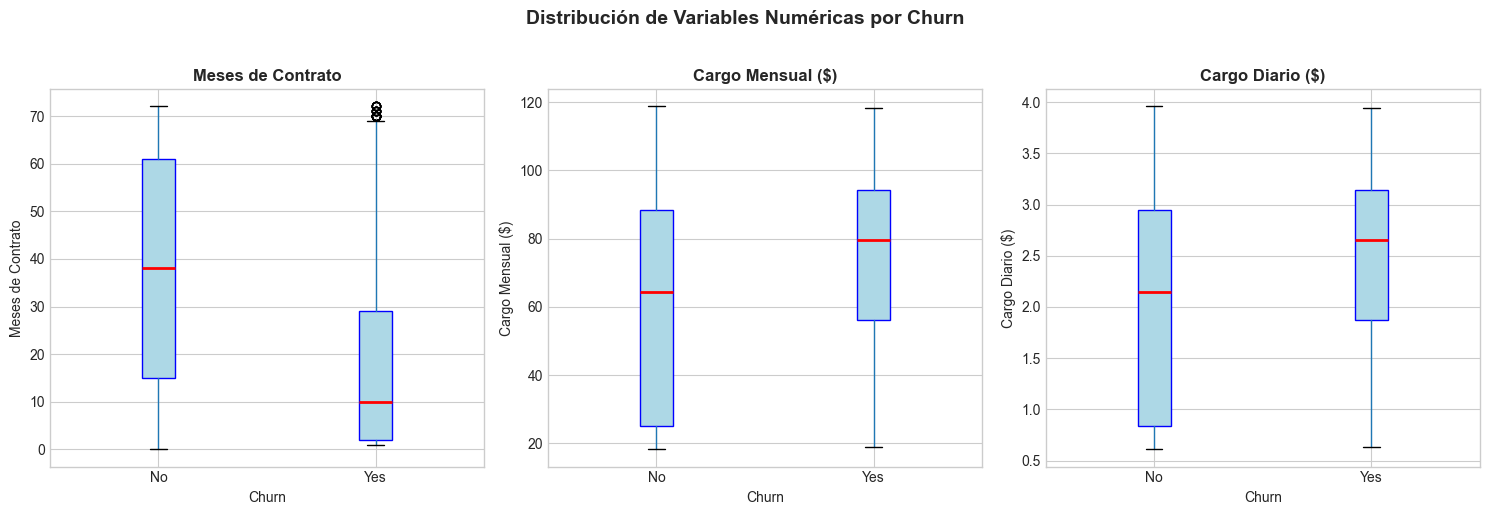

Gráfico guardado: boxplots_churn.png


In [32]:
# Boxplots de variables numéricas por Churn
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

numeric_vars = ['Meses_Contrato', 'Cargo_Mensual', 'Cargo_Diario']
titles = ['Meses de Contrato', 'Cargo Mensual ($)', 'Cargo Diario ($)']

for ax, var, title in zip(axes, numeric_vars, titles):
    df.boxplot(column=var, by='Churn', ax=ax, 
               patch_artist=True,
               boxprops=dict(facecolor='lightblue', color='blue'),
               medianprops=dict(color='red', linewidth=2))
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Churn')
    ax.set_ylabel(title)

plt.suptitle('Distribución de Variables Numéricas por Churn', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('boxplots_churn.png', dpi=150, bbox_inches='tight')
plt.show()
print("Gráfico guardado: boxplots_churn.png")

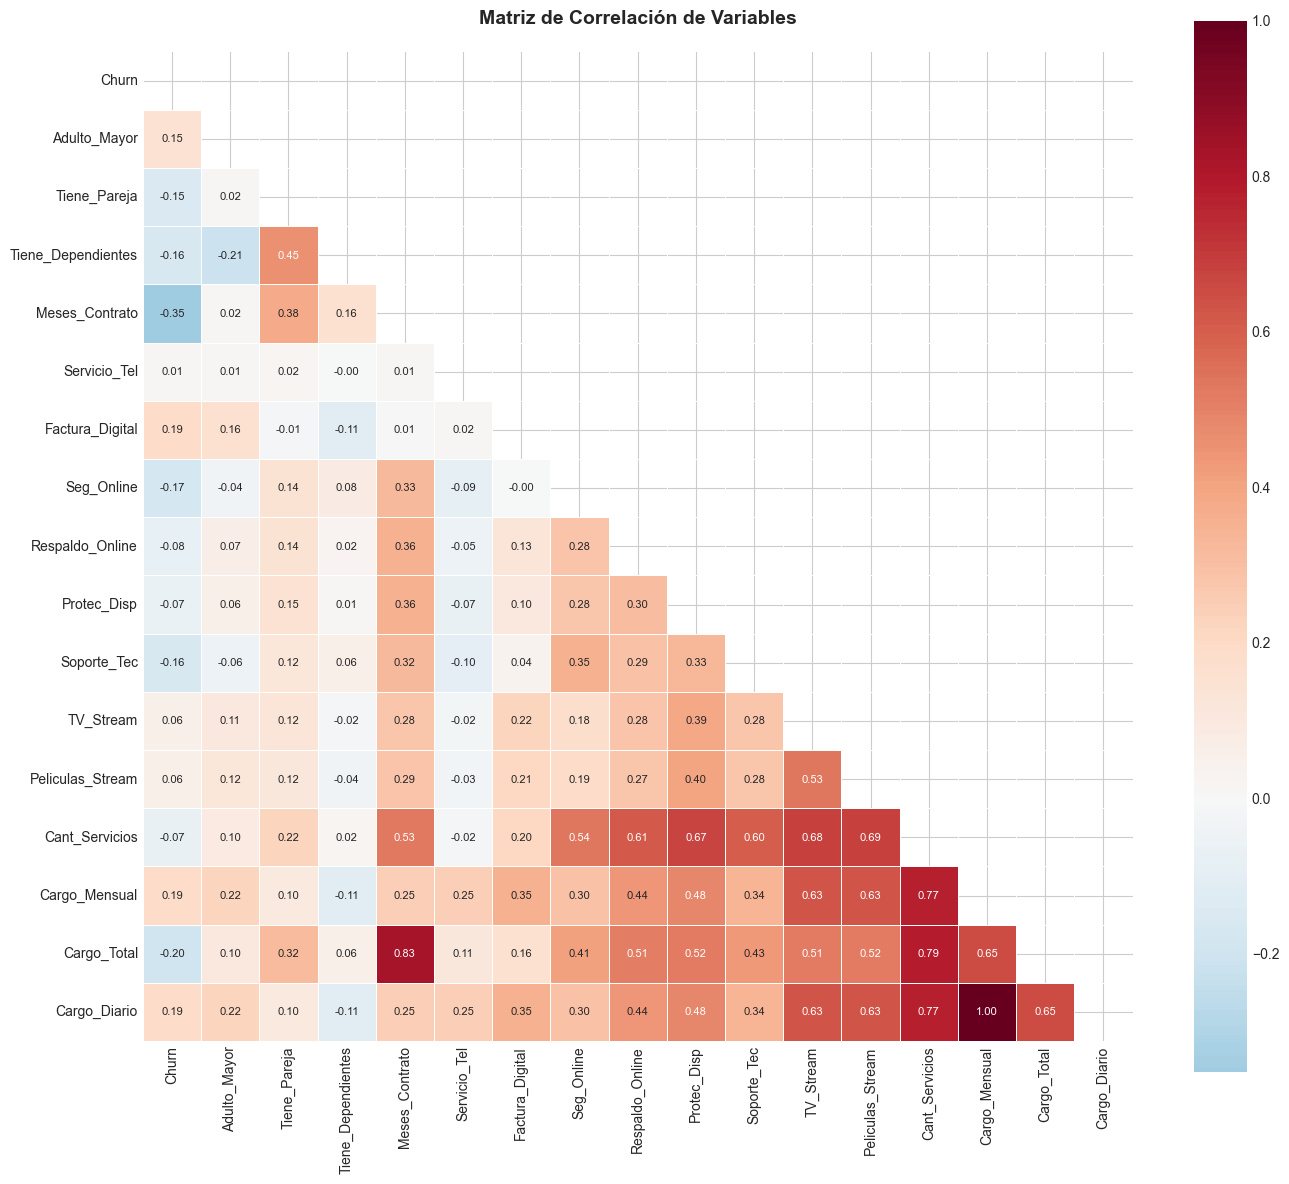

Gráfico guardado: matriz_correlacion.png


In [34]:
## 3.4 Análisis de correlación
# Preparar datos para correlación
df_corr = df_binary[[
    'Churn_Bin', 'Adulto_Mayor_Bin', 'Tiene_Pareja_Bin', 'Tiene_Dependientes_Bin',
    'Meses_Contrato', 'Servicio_Telefonico_Bin', 'Factura_Digital_Bin',
    'Seguridad_Online_Bin', 'Respaldo_Online_Bin', 'Proteccion_Dispositivo_Bin',
    'Soporte_Tecnico_Bin', 'TV_Streaming_Bin', 'Peliculas_Streaming_Bin',
    'Cantidad_Servicios', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario'
]].copy()

# Renombrar columnas para mejor visualización
df_corr.columns = [
    'Churn', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes',
    'Meses_Contrato', 'Servicio_Tel', 'Factura_Digital',
    'Seg_Online', 'Respaldo_Online', 'Protec_Disp',
    'Soporte_Tec', 'TV_Stream', 'Peliculas_Stream',
    'Cant_Servicios', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario'
]

# Calcular matriz de correlación
corr_matrix = df_corr.corr()

# Crear heatmap
fig, ax = plt.subplots(figsize=(14, 12))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, square=True, linewidths=0.5, ax=ax,
            annot_kws={'size': 8})

ax.set_title('Matriz de Correlación de Variables', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('matriz_correlacion.png', dpi=150, bbox_inches='tight')
plt.show()
print("Gráfico guardado: matriz_correlacion.png")

In [35]:
# Correlaciones más fuertes con Churn
print("CORRELACIONES CON CHURN")
print("=" * 50)
churn_correlations = corr_matrix['Churn'].drop('Churn').sort_values(key=abs, ascending=False)
print("\nFactores con mayor correlación con Churn:")
for factor, corr in churn_correlations.items():
    direction = "↑" if corr > 0 else "↓"
    print(f"   {direction} {factor}: {corr:.3f}")

CORRELACIONES CON CHURN

Factores con mayor correlación con Churn:
   ↓ Meses_Contrato: -0.352
   ↓ Cargo_Total: -0.198
   ↑ Cargo_Mensual: 0.193
   ↑ Cargo_Diario: 0.193
   ↑ Factura_Digital: 0.192
   ↓ Seg_Online: -0.171
   ↓ Soporte_Tec: -0.165
   ↓ Tiene_Dependientes: -0.164
   ↑ Adulto_Mayor: 0.151
   ↓ Tiene_Pareja: -0.150
   ↓ Respaldo_Online: -0.082
   ↓ Cant_Servicios: -0.070
   ↓ Protec_Disp: -0.066
   ↑ TV_Stream: 0.063
   ↑ Peliculas_Stream: 0.061
   ↑ Servicio_Tel: 0.012


#📄Informe final